In [1]:
import cv2
import matplotlib.pyplot as plt
import face_recognition
import numpy as np
from os.path import join
import glob

In [2]:
cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)

### Train the model

In [3]:
train_images_dir = join("images", "train")
train_images = glob.glob(join(train_images_dir, "*.jpg"))

train_image_encodings = []
for train_image in train_images:
    train_image_model = face_recognition.load_image_file(train_image)
    train_image_encoding = face_recognition.face_encodings(train_image_model)
    if len(train_image_encoding) > 0:
        train_image_encodings.append(train_image_encoding[0])
    else:
        print(train_image)

In [32]:
THRESHOLD = 0.5

def get_image_name_from_path(image_path):
    output_image_name = image_path.split("/")[-1]
    person_name = output_image_name.split(".")[0]
    return person_name

def detect_person(rgb_frame):
    
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)
    
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        
        matches = face_recognition.compare_faces(train_image_encodings, face_encoding)
        name = "Unknown"

        if True in matches:
            first_match_index = matches.index(True)
            name = get_image_name_from_path(train_images[first_match_index])

        cv2.rectangle(rgb_frame, (left, top), (right, bottom), (0, 0, 255), 2)

        cv2.rectangle(rgb_frame, (left, bottom), (right, bottom + 50), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(rgb_frame, name, (left + 6, bottom + 40), font, 1.5, (255, 255, 255), 1)
    
    figure(figsize = (10,10))
    plt.imshow(rgb_frame)
    plt.show()

In [29]:
def get_frame_from_camera():
    retval, im = vc.read()
    return im

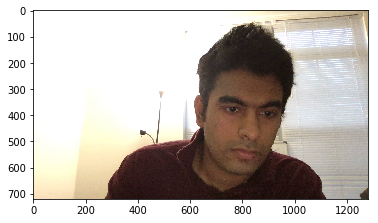

In [33]:
frame = get_frame_from_camera()
rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_frame)
plt.show()

In [34]:
detect_person(rgb_frame)

NameError: name 'figure' is not defined